In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.datasets import load_sample_image

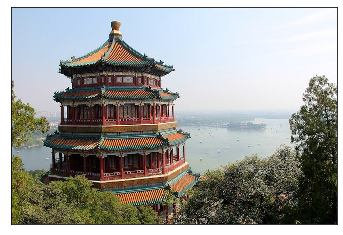

In [2]:
chin=load_sample_image("china.jpg")
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(chin)

In [3]:
chin.shape

(427, 640, 3)

In [4]:
#reshape
data=chin/255.0
data=data.reshape(427*640,3)
data.shape

(273280, 3)

In [5]:
#visualize the pixels in this color space, using a subset of 10000 pixels for efficiency
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors=data
        
    # choose a random subset
    rng=np.random.RandomState(0)
    i=rng.permutation(data.shape[0])[:N]
    colors=colors[i]
    R, G, B=data[i].T
    
    fig, ax = plt.subplots(1,2, figsize=(16,6))
    ax[0].scatter(R,G, color=colors,marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0,1), ylim=(0,1))
    
    ax[1].scatter(R,B, color=colors,marker='.')
    ax[1].set(xlabel='Red',ylabel='Blue', xlim=(0,1), ylim=(0,1))
    
    fig.suptitle(title, size=20),

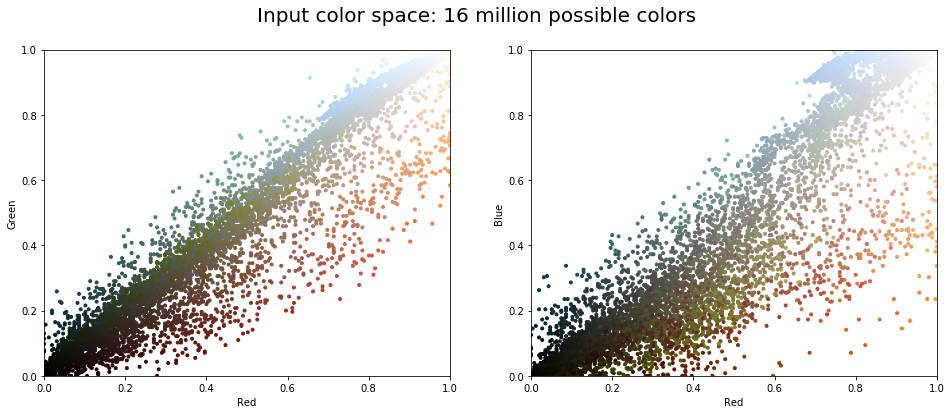

In [6]:
plot_pixels(data, title='Input color space: 16 million possible colors')

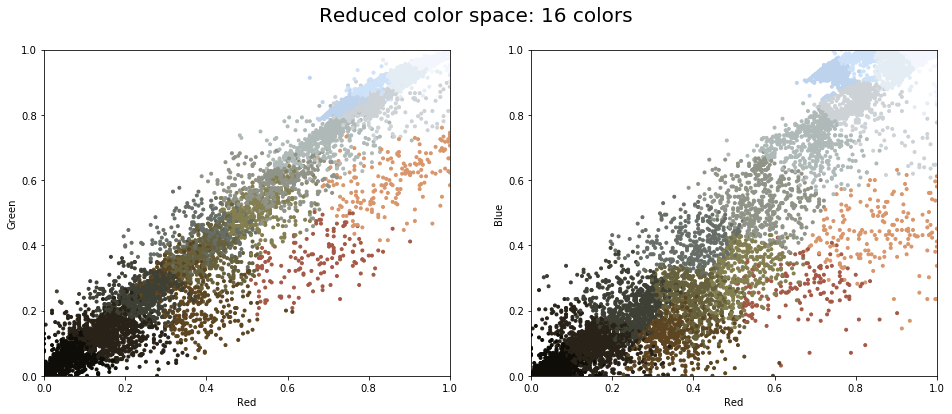

In [8]:
#fix numpy issues
import warnings; warnings.simplefilter('ignore')

#reducing these 16 million colors to just 16 colors
from sklearn.cluster import MiniBatchKMeans
kmeans=MiniBatchKMeans(16)
kmeans.fit(data)
new_colors=kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

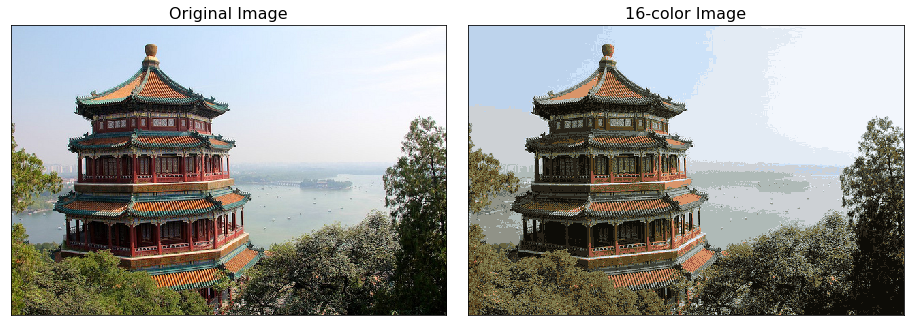

In [9]:
chin_recolored=new_colors.reshape(chin.shape)
fig, ax=plt.subplots(1,2,figsize=(16,6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(chin)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(chin_recolored)
ax[1].set_title('16-color Image', size=16);